<a href="https://colab.research.google.com/github/AnhQuan-ZeaXArk/B-i-t-p-l-n-ANN-Thi-t-k-v-training-model-CNN-c-nh-b-o-tai-n-n-lao-ng./blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error loading /content/drive/MyDrive/Data/train/no_accident/.ipynb_checkpoints: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3571 - loss: 0.7033 - val_accuracy: 0.6250 - val_loss: 0.6399
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6733 - val_accuracy: 0.3750 - val_loss: 0.7305
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5357 - loss: 0.6738 - val_accuracy: 0.6250 - val_loss: 0.6369
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5714 - loss: 0.7031 - val_accuracy: 0.6250 - val_loss: 0.6283
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6071 - loss: 0.6281 - val_accuracy: 0.6250 - val_loss: 0.6762
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step - accuracy: 0.6071 - loss: 0.6856 - val_accuracy: 0.6250 - val_loss: 0.6359
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4286 - loss: 0.6941 - val_accuracy: 0.6250 - val_loss: 0.6496
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5714 - loss: 0.6388 - val_accuracy: 0.8750 - val_loss: 0.6617
Epoch 9/50
1/1 ━━━━━━━━━

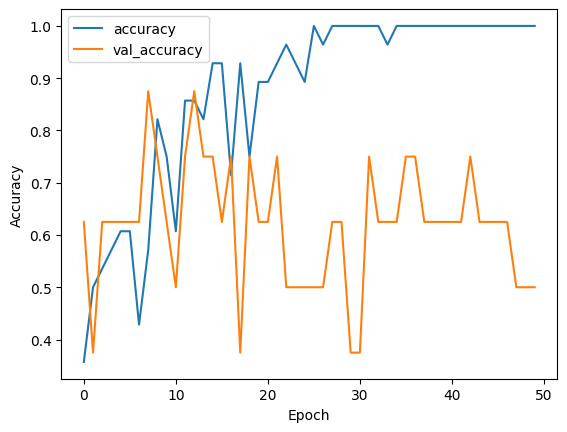

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


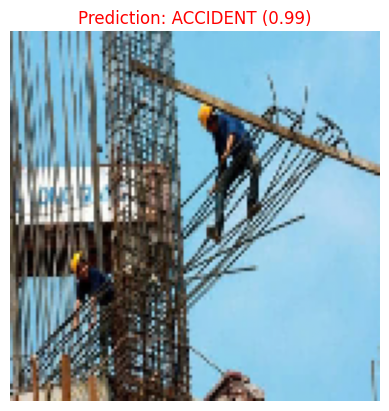

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.5000 - loss: 2.7923
[2.7922677993774414, 0.5]


In [ ]:
# Cài đặt các thư viện cần thiết
!pip install opencv-python numpy tensorflow keras matplotlib

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Tải dữ liệu từ Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Hàm tạo mô hình CNN
def create_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    return model

# Chuẩn bị dữ liệu
# Thay đổi đường dẫn phù hợp với dữ liệu của bạn
data_dir = '/content/drive/MyDrive/Data/train'
accident_dir = os.path.join(data_dir, 'accident')
no_accident_dir = os.path.join(data_dir, 'no_accident')

# Tải và tiền xử lý ảnh
def load_images(folder, label, img_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
    return images, labels

# Tải ảnh tai nạn và không tai nạn
accident_images, accident_labels = load_images(accident_dir, 1)
no_accident_images, no_accident_labels = load_images(no_accident_dir, 0)

# Kết hợp dữ liệu
X = np.array(accident_images + no_accident_images)
y = np.array(accident_labels + no_accident_labels)

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
X_train = X_train / 255.0
X_test = X_test / 255.0

# Tạo mô hình
input_shape = X_train[0].shape
model = create_model(input_shape)

# Huấn luyện mô hình
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test))

# Đánh giá mô hình
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
import matplotlib.pyplot as plt

def predict_image(model, image_path, img_size=(128, 128)):
    # Đọc và xử lý ảnh
    img = cv2.imread(image_path)
    if img is None:
        print(f"Không tìm thấy ảnh tại: {image_path}")
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = img / 255.0
    input_img = np.expand_dims(img, axis=0)

    # Dự đoán
    prediction = model.predict(input_img)
    is_accident = prediction[0][0] > 0.5

    # Hiển thị ảnh và kết quả
    label = "ACCIDENT" if is_accident else "NO_ACCIDENT"
    plt.imshow(img)
    plt.title(f"Prediction: {label} ({prediction[0][0]:.2f})", color='red' if is_accident else 'green')
    plt.axis('off')
    plt.show()

    return label

# Đường dẫn ảnh test
test_image_path = '/content/drive/MyDrive/Data/test/accident/15.jpg'
predict_image(model, test_image_path)

def detect_accident(model, video_source=0, img_size=(128, 128)):
    cap = cv2.VideoCapture(video_source)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Tiền xử lý frame
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        resized_frame = cv2.resize(rgb_frame, img_size)
        normalized_frame = resized_frame / 255.0
        input_frame = np.expand_dims(normalized_frame, axis=0)

        # Dự đoán
        prediction = model.predict(input_frame)
        is_accident = prediction[0][0] > 0.5

        # Hiển thị kết quả
        label = "ACCIDENT!" if is_accident else "Safe"
        color = (0, 0, 255) if is_accident else (0, 255, 0)
        cv2.putText(frame, label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

        cv2.imshow('Labor Safety Monitoring', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

detect_accident(model)

# Lưu mô hình
model.save('cnn_accident_detection.h5')

# Kiểm tra độ chính xác của model
print(model.evaluate(X_test, y_test))